In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\prana\Downloads\malaria_detection.csv")

In [3]:
df

,filename,label
0,C50P11thinF_IMG_20150724_114951_cell_148.png,malaria
1,C112P73ThinF_IMG_20150930_131659_cell_94.png,healthy
2,C59P20thinF_IMG_20150803_111333_cell_144.png,malaria
3,C158P119ThinF_IMG_20151115_181136_cell_202.png,malaria
4,C81P42ThinF_IMG_20150817_120524_cell_190.png,malaria
...,...,...
19285,C137P98ThinF_IMG_20151005_162348_cell_2.png,malaria
19286,C159P120ThinF_IMG_20151115_190421_cell_204.png,malaria
19287,C7NthinF_IMG_20150611_104609_cell_187.png,healthy
19288,C182P143NThinF_IMG_20151201_171950_cell_220.png,malaria


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 

In [5]:
df['label']=le.fit_transform(df['label'])

In [6]:
df

,filename,label
0,C50P11thinF_IMG_20150724_114951_cell_148.png,1
1,C112P73ThinF_IMG_20150930_131659_cell_94.png,0
2,C59P20thinF_IMG_20150803_111333_cell_144.png,1
3,C158P119ThinF_IMG_20151115_181136_cell_202.png,1
4,C81P42ThinF_IMG_20150817_120524_cell_190.png,1
...,...,...
19285,C137P98ThinF_IMG_20151005_162348_cell_2.png,1
19286,C159P120ThinF_IMG_20151115_190421_cell_204.png,1
19287,C7NthinF_IMG_20150611_104609_cell_187.png,0
19288,C182P143NThinF_IMG_20151201_171950_cell_220.png,1


In [7]:
from sklearn.model_selection import train_test_split as tts
train_f,test_f,train_l,test_l=tts(df['filename'],df['label'],test_size=0.2,random_state=20)

In [8]:
train_f.shape

(15432,)

In [9]:
test_f.shape

(3858,)

In [10]:
from skimage.io import imread,imshow

In [11]:
from skimage.transform import resize

## Reading a random image

In [12]:
import os
base_path=os.path.join(r"C:\Users\prana\Downloads\cell_images\cell_images")

In [13]:
from random import randint
rm=randint(0,15432)
img=imread(os.path.join(base_path,train_f.iloc[rm]))

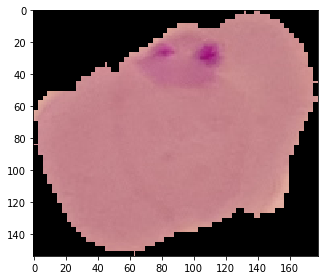

In [14]:
imshow(img)

In [15]:
df["label"][rm]

1

# Creating Hog Features

In [29]:
from skimage.feature import hog
train_features=[]
for i in train_f:
    image=imread(os.path.join(base_path,i))
    image=resize(image,(128,64))
    features,hog_image=hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,multichannel=True)
    train_features.append(features)

In [22]:
from skimage.feature import hog
test_features=[]
for i in test_f:
    image=imread(os.path.join(base_path,i))
    image=resize(image,(128,64))
    features,hog_image=hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,multichannel=True)
    test_features.append(features)

# Classifiers

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_features,train_l)
print("Test score =",100*lr.score(test_features,test_l),"%")

C:\Users\prana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test score = 81.49300155520996 %


In [55]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt.fit(train_features,train_l)
print("test score=",100*dt.score(test_features,test_l),"%")

test score= 67.23691031622603 %


In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_features,train_l)
print("test score=",100*rf.score(test_features,test_l),"%")

<ipython-input-56-350e6ac4b314>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features,train_l)


test score= 81.36340072576465 %


In [51]:
import numpy as np
train_features=np.array(train_features)
test_features=np.array(test_features)

In [52]:
train_l

,label
8752,0
9571,1
6531,0
3230,0
16618,1
...,...
1607,1
3915,0
14729,0
4367,0


In [61]:
from xgboost import XGBClassifier
xg=XGBClassifier(max_depth=7)
xg.fit(train_features,train_l)
print("test score=",100*xg.score(test_features,test_l),"%")


C:\Users\prana\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[12:42:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test score= 85.12182477967859 %


In [41]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_features,train_l)
print("test score=",100*nb.score(test_features,test_l),"%")

test score= 65.99274235355107 %


In [42]:
from sklearn.linear_model import PassiveAggressiveClassifier
ps=PassiveAggressiveClassifier()
ps.fit(train_features,train_l)
print("test score=",100*ps.score(test_features,test_l),"%")

test score= 78.38258164852256 %


## Predicting a random picture

In [59]:
img_features=[]
img=imread(r"C:\Users\prana\OneDrive\college applications\malaria pic.jpg")
img=resize(image,(128,64))
features,hog_image=hog(image,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,multichannel=True)
img_features.append(features)

In [60]:
lr.predict(img_features)

array([1])